# Experiments with WCDS
This notebook contains all experiments that are done using WCDS.

In [1]:
import matplotlib.pyplot as plt
from wcds.wcds import WCDS
from wcds.clusterers import AgglomerativeClustering
from sklearn.utils import shuffle
from sklearn.preprocessing import minmax_scale
import pandas as pd
import numpy as np
import random
import math
import time

## Datasets
In the following sections `datastream` will be the variable storing the current datastream. It uses a pandas dataframe for doing so.

By executing one of the following cells, the chosen dataset/-stream will be loaded.

In [44]:
# Complex8
url = "http://www2.cs.uh.edu/~ml_kdd/restored/Complex&Diamond/Complex8.data"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None)
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = shuffle(datastream)
datastream["Time"] = list(range(len(datastream)))

In [31]:
# Complex9
url = "http://www2.cs.uh.edu/~ml_kdd/restored/Complex&Diamond/Complex9.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None)
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = shuffle(datastream)
datastream["Time"] = list(range(len(datastream)))

In [23]:
# D31
url = "http://cs.joensuu.fi/sipu/datasets/D31.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None, sep="\t")
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = shuffle(datastream)
datastream["Time"] = list(range(len(datastream)))

In [14]:
# Jain
url = "http://cs.joensuu.fi/sipu/datasets/jain.txt"
data = pd.read_csv(url, names=['X', 'Y', "Class"], header=None, sep="\t")
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = shuffle(datastream)
datastream["Time"] = list(range(len(datastream)))

ValueError: could not convert string to float: '0.85\t17.45\t2'

In [ ]:
# 10% of Network Intrusion Detection (kddcup 1999)
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
# TODO

In [2]:
# Forest Cover Type
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
datastream = pd.read_csv(url, header=None)
"""
Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
"""
# TODO

In [ ]:
# Gas mixture dataset
url = 
datastream = 
# TODO

## Online clustering
The next steps is to perform the online step of stream clustering with wcds.

In [33]:
%%time
# For Toy 2d sets use gamma = 200, omega = inf, mu = 0, delta = 200
# time really needed or use index?; use moa and sam knn datasets
# instead of
#targeting a given number of clusters, the stopping criterion for this procedure was
#defined based on the inconsistency coefficients of the links of its hierarchical cluster
#tree
# USE OTHER DATASETS, Show epsilon area, Agglomerative clustering on points, outlier detection, check if new ptrdiction is same to merge stuff
# cluster on datapoints of microclusters
# calculate purity of clusterer
# merge unmerged clusterers
# save figures
# Visulaisierung
# Use different colormaps for discriminators and visualize there emerging growing and deletion

# Parameters
OMEGA = 3000
DELTA = 200
GAMMA = 400
EPSILON = 0.85
µ = 0

c_online = WCDS(
    omega=OMEGA,
    delta=DELTA,
    gamma=GAMMA,
    epsilon=EPSILON,
    dimension=len(datastream[0][0]),
    µ=µ)

assigned_discriminators = []
for i in datastream:
    obs, time_ = i
    k = c_online.record(obs, time_)
    assigned_discriminators.append(k)

Wall time: 51.4 s


In [ ]:
# Optional save
clusterer.save("wcds.json")

## Offline clustering
Now we perform offline clustering on wcds current configuration.

In [34]:
%%time

c_offline = AgglomerativeClustering()
actual_clusters = c_offline.fit(c_online.discriminators, n_clusters=8)

Wall time: 1.02 s


## Plot results

In [35]:
# Initialize color list
number_of_colors = max(assigned_discriminators)+1
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
color_dict = {key: value for (key, value) in enumerate(colors)}

Found 45 Microclusters and formed 8 Clusters.


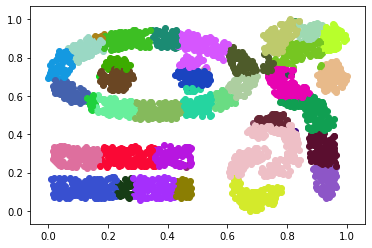

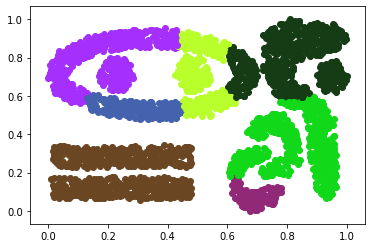

In [36]:
# Plot results of online vs offline clustering
%matplotlib inline

# Online
plt.figure(1)
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    plt.scatter(datastream[i][0][0], datastream[i][0][1], marker="o", color=color_dict[int(k)])

# Offline
plt.figure(2)
def return_correct(index, clustering):
    for i in range(len(clustering)):
        if index in clustering[i]:
            return i
        
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    correct = return_correct(k, actual_clusters)
    plt.scatter(datastream[i][0][0], datastream[i][0][1], marker="o", color=color_dict[correct])
    
print("Found {} Microclusters and formed {} Clusters.".format(max(assigned_discriminators)+1, len(actual_clusters)))
plt.show()

In [ ]:
# Use omega last points and their discriminator assignments to cluster

<IPython.core.display.Javascript object>


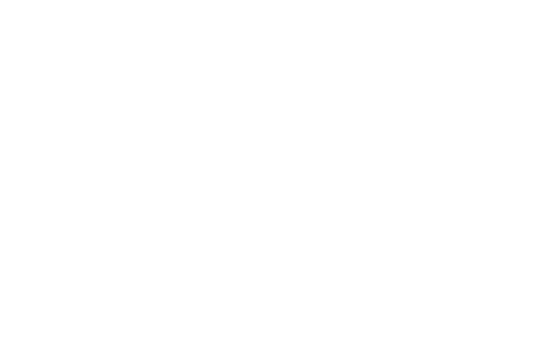

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


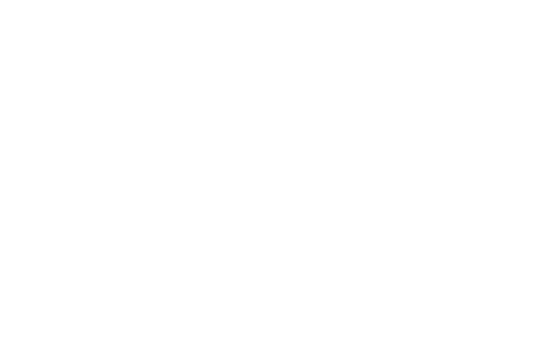

In [60]:
# Live online clustering plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    ax.scatter(datastream[i][0][0], datastream[i][0][1], marker="o", color=color_dict[int(k)])
    fig.canvas.draw()
    #time.sleep(.01)

In [54]:
# Show discriminator bubble

from matplotlib import cm
cm_subsection = np.linspace(0.0, 1.0, 1000)
colors = [cm.jet(x) for x in cm_subsection]

def plot_discriminator(c_id, step=0.01):
    points = []
    border = []
    
    for i in np.arange(0,1,step):
        for j in np.arange(0,1,step):
            matching_rate = c_online.discriminators[c_id].matching(c_online.addressing((i,j)))
            c = colors[round(matching_rate*999)]
            if abs(c_online.epsilon - matching_rate) < 0.015:
                border.append((((i,j), "black")))
            points.append(((i,j), c))
    # Plot heat map
    plt.scatter([point[0][0] for point in points], [point[0][1] for point in points], marker="s", s=1, c=[point[1] for point in points])
    # Plot epsilon border
    plt.scatter([point[0][0] for point in border], [point[0][1] for point in border], marker="o", s=1, c=[point[1] for point in border])
    # Plot points assigned to discriminator
    plt.scatter([datastream[i][0][0] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                [datastream[i][0][1] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                marker="X", s=2, color="white")
    plt.ylim((0,1))
    plt.xlim((0,1))
    plt.axis('equal')
    plt.show()

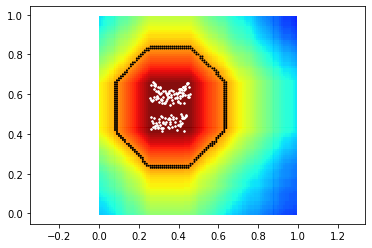

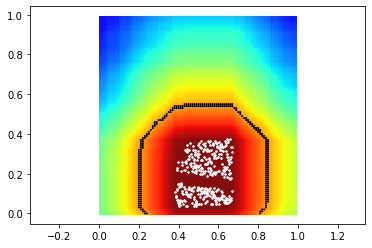

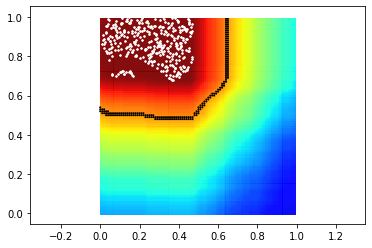

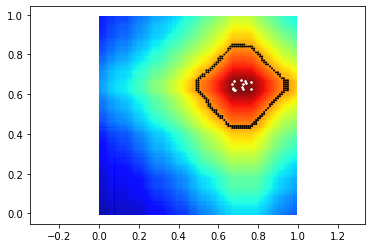

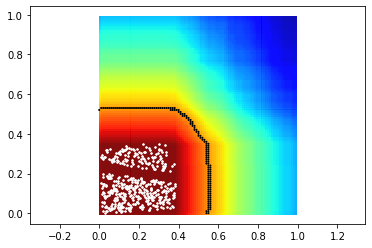

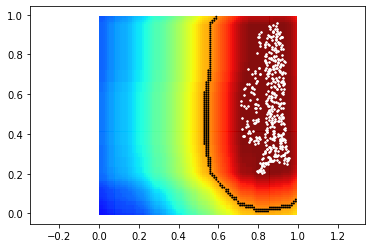

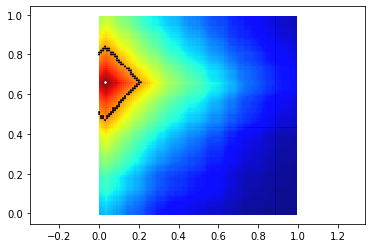

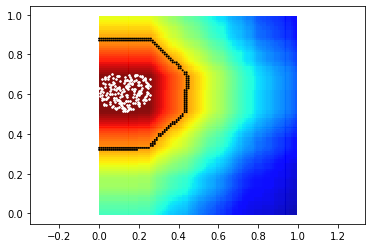

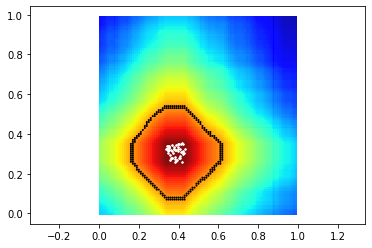

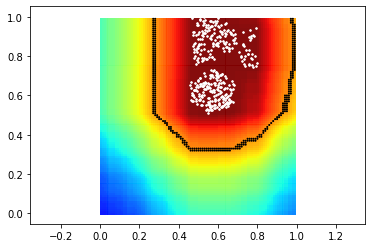

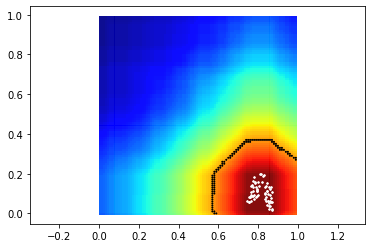

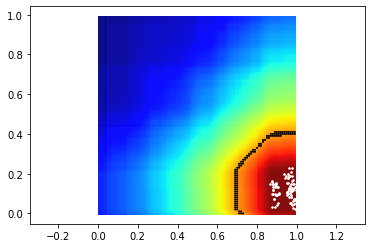

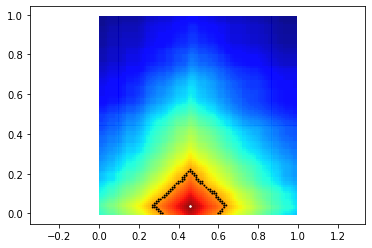

In [57]:
for i in range(max(assigned_discriminators)+1):
    plot_discriminator(i)